# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [22]:
import numpy as np
## please add the essential libraries

# YOUR CODE HERE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [57]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 10
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data

datagen = ImageDataGenerator(
    rescale=1./255,
    zca_epsilon=1e-06,

    )

# Your Code HERE

train_datagen = datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

#valid_generator = 
val_datagen = datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

# test_generator  = 
test_datagen = datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

# please print the number of samples in each folder 
# Your Code HERE
train_sample = train_datagen.samples
val_sample = val_datagen.samples
test_sample = test_datagen.samples

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [67]:
# build conv2D CNN model, be careful with softmax and output layers is 10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (img_height, img_width, 3)

print(f'Input shape : {input_shape}')


# define the Convolutional Neural Network
# Your Code HERE
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(10,activation ="softmax"))


model.summary()

Input shape : (224, 224, 3)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoo

In [68]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

#Train the model with training and validation set
#model.fit()
#, callbacks=[callback]
hist = model.fit(train_datagen, epochs=epochs, validation_data=val_datagen)

Epoch 1/10


2022-05-17 15:10:48.285451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.8217 - accuracy: 0.3489

2022-05-17 15:11:16.859579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 33s 125ms/step - loss: 1.8217 - accuracy: 0.3489 - val_loss: 0.9863 - val_accuracy: 0.7026
Epoch 2/10
261/261 [==============================] - 32s 123ms/step - loss: 0.4593 - accuracy: 0.8534 - val_loss: 0.5731 - val_accuracy: 0.8520
Epoch 3/10
261/261 [==============================] - 32s 123ms/step - loss: 0.1124 - accuracy: 0.9677 - val_loss: 0.5324 - val_accuracy: 0.8958
Epoch 4/10
261/261 [==============================] - 32s 123ms/step - loss: 0.0325 - accuracy: 0.9916 - val_loss: 0.5571 - val_accuracy: 0.8951
Epoch 5/10
261/261 [==============================] - 32s 123ms/step - loss: 0.0878 - accuracy: 0.9777 - val_loss: 0.5132 - val_accuracy: 0.8851
Epoch 6/10
261/261 [==============================] - 32s 124ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.5633 - val_accuracy: 0.9102
Epoch 7/10
261/261 [==============================] - 32s 123ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.6275 - val_accuracy: 0.8

##Test

In [69]:
# Test the model on a testing dataset
# Your Code HERE
score = model.evaluate(test_datagen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.6422104835510254
Test accuracy: 0.8829023241996765


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [27]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
from tensorflow.python.keras import regularizers

# Your code HERE

input_shape = input_shape = (img_height, img_width, 3)

print(f'Input shape : {input_shape}')


# define the Convolutional Neural Network
# Your Code HERE
model_l1 = keras.Sequential()
model_l1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape, kernel_regularizer='l1'))
model_l1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', kernel_regularizer='l1'))
model_l1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid', kernel_regularizer='l1'))
model_l1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l1.add(Flatten())
model_l1.add(Dense(64,activation ="relu"))
model_l1.add(Dense(128,activation ="relu"))
model_l1.add(Dense(128,activation ="relu"))
model_l1.add(Dense(10,activation ="softmax"))


model_l1.summary()


Input shape : (224, 224, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPool

In [28]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
model_l1.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

#Train the model with training and validation set
#model.fit()
hist_l1 = model_l1.fit(train_datagen, epochs=epochs, validation_data=val_datagen)

Epoch 1/10


2022-05-17 13:10:18.444555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 4.0772 - accuracy: 0.7251

2022-05-17 13:10:47.882899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 34s 129ms/step - loss: 4.0772 - accuracy: 0.7251 - val_loss: 0.8411 - val_accuracy: 0.8693
Epoch 2/10
261/261 [==============================] - 33s 126ms/step - loss: 0.3811 - accuracy: 0.9749 - val_loss: 0.8074 - val_accuracy: 0.8671
Epoch 3/10
261/261 [==============================] - 33s 127ms/step - loss: 0.2631 - accuracy: 0.9943 - val_loss: 0.7429 - val_accuracy: 0.8728
Epoch 4/10
261/261 [==============================] - 33s 126ms/step - loss: 0.2191 - accuracy: 0.9988 - val_loss: 0.6653 - val_accuracy: 0.8915
Epoch 5/10
261/261 [==============================] - 33s 126ms/step - loss: 0.1908 - accuracy: 1.0000 - val_loss: 0.6381 - val_accuracy: 0.8879
Epoch 6/10
261/261 [==============================] - 33s 126ms/step - loss: 0.1763 - accuracy: 1.0000 - val_loss: 0.6254 - val_accuracy: 0.8793
Epoch 7/10
261/261 [==============================] - 34s 131ms/step - loss: 0.1678 - accuracy: 1.0000 - val_loss: 0.6059 - val_accuracy: 0.8

Test loss: 0.8380147814750671
Test accuracy: 0.8232758641242981


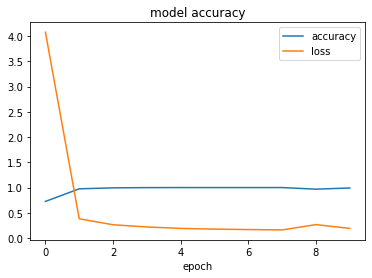

In [29]:
# Test the model on a testing dataset
# Your Code HERE
import matplotlib.pyplot as plt

score = model_l1.evaluate(test_datagen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Best so far 
# Test accuracy: 0.625
plt.plot(hist_l1.history['accuracy'])
plt.plot(hist_l1.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [30]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE

print(f'Input shape : {input_shape}')


# define the Convolutional Neural Network
# Your Code HERE
model_l2 = keras.Sequential()
model_l2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape, kernel_regularizer='l2'))
model_l2.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', kernel_regularizer='l2'))
model_l2.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid', kernel_regularizer='l2'))
model_l2.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l2.add(Flatten())
model_l2.add(Dense(64,activation ="relu"))
model_l2.add(Dense(128,activation ="relu"))
model_l2.add(Dense(128,activation ="relu"))
model_l2.add(Dense(10,activation ="softmax"))

model_l2.summary()


Input shape : (224, 224, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPool

In [31]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
model_l2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

#Train the model with training and validation set
#model.fit()
hist_l2 = model_l2.fit(train_datagen, epochs=epochs, validation_data=val_datagen)


Epoch 1/10


2022-05-17 13:15:57.836196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 0.9621 - accuracy: 0.7368

2022-05-17 13:16:27.137244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 34s 128ms/step - loss: 0.9621 - accuracy: 0.7368 - val_loss: 0.8279 - val_accuracy: 0.8269
Epoch 2/10
261/261 [==============================] - 33s 128ms/step - loss: 0.1379 - accuracy: 0.9749 - val_loss: 0.7923 - val_accuracy: 0.8434
Epoch 3/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0613 - accuracy: 0.9916 - val_loss: 0.8731 - val_accuracy: 0.8290
Epoch 4/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0395 - accuracy: 0.9957 - val_loss: 0.7516 - val_accuracy: 0.8815
Epoch 5/10
261/261 [==============================] - 34s 129ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.6161 - val_accuracy: 0.8793
Epoch 6/10
261/261 [==============================] - 34s 129ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.6460 - val_accuracy: 0.8772
Epoch 7/10
261/261 [==============================] - 34s 130ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.6592 - val_accuracy: 0.8

Test loss: 0.7776813507080078
Test accuracy: 0.8441091775894165


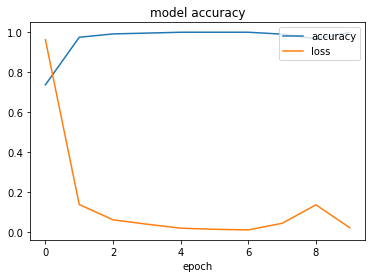

In [32]:
# Test the model on a testing dataset
# Your Code HERE
score = model_l2.evaluate(test_datagen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Best so far 
# Test accuracy: 0.625
plt.plot(hist_l2.history['accuracy'])
plt.plot(hist_l2.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [81]:
# load pre-trained resnet 50 from libarary
# your Code HERE
resnet50 = keras.applications.ResNet50(
    weights="imagenet",
    input_shape=(img_height, img_width, 3),
    include_top=False
)

In [82]:
# Fine-tune the model to fit our project  
# your Code HERE
inputs = keras.Input(shape=(img_height, img_width, 3))
x = resnet50(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)
y = keras.layers.Dense(128, activation='relu')(x)
y = keras.layers.Dense(64, activation='relu')(y)
outputs = keras.layers.Dense(num_classes, activation='softmax')(y)


model_resnet50 = keras.Model(inputs, outputs)

# Freeze the base pre-trained model initially
model_resnet50.layers[1].trainable=False
# model.layers[4].trainable=False


# Please compile the new model
#model.compile()
model_resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model_resnet50.summary()




Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_60 (Dense)            (None, 128)               262272    
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 10)                650       
                                                           

In [83]:
#Train the model with training and validation set
#model.fit()
hist_resnet50 = model_resnet50.fit(train_datagen, epochs=epochs,
             validation_data=val_datagen)

Epoch 1/10


2022-05-17 16:51:56.906119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 2.0999 - accuracy: 0.1983

2022-05-17 16:52:40.190532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 59s 219ms/step - loss: 2.0999 - accuracy: 0.1983 - val_loss: 1.9287 - val_accuracy: 0.2565
Epoch 2/10
261/261 [==============================] - 56s 213ms/step - loss: 1.8821 - accuracy: 0.2452 - val_loss: 1.9666 - val_accuracy: 0.2263
Epoch 3/10
261/261 [==============================] - 56s 214ms/step - loss: 1.7983 - accuracy: 0.2718 - val_loss: 1.9026 - val_accuracy: 0.2141
Epoch 4/10
261/261 [==============================] - 55s 212ms/step - loss: 1.7253 - accuracy: 0.2876 - val_loss: 1.8762 - val_accuracy: 0.2486
Epoch 5/10
261/261 [==============================] - 56s 213ms/step - loss: 1.6532 - accuracy: 0.3264 - val_loss: 1.6019 - val_accuracy: 0.3772
Epoch 6/10
261/261 [==============================] - 55s 212ms/step - loss: 1.6198 - accuracy: 0.3230 - val_loss: 1.5500 - val_accuracy: 0.3901
Epoch 7/10
261/261 [==============================] - 55s 212ms/step - loss: 1.5939 - accuracy: 0.3441 - val_loss: 1.5558 - val_accuracy: 0.3

Test loss: 1.5164062976837158
Test accuracy: 0.3965517282485962


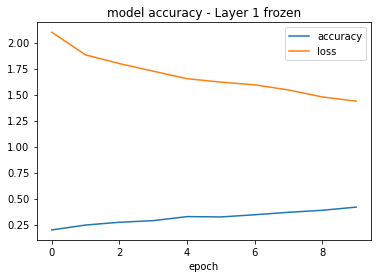

In [84]:
# We expect this accuracy to be low since it's just 2 dense layers trying to work with image input.

score = model_resnet50.evaluate(test_datagen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(hist_resnet50.history['accuracy'])
plt.plot(hist_resnet50.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy - Layer 1 frozen')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [85]:
# Unfreeze the base pre-trained model and freeze the 4th dense layer
model_resnet50.layers[1].trainable=True
model_resnet50.layers[3].trainable=False

model_resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model_resnet50.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_60 (Dense)            (None, 128)               262272    
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 10)                650       
                                                           

In [86]:
callback_acc = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

history_resnet = model_resnet50.fit(train_datagen, epochs=epochs,
             validation_data=val_datagen, callbacks=[callback_acc])

Epoch 1/10


2022-05-17 17:01:31.102243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 2.8708 - accuracy: 0.1018

2022-05-17 17:03:51.307215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 157s 585ms/step - loss: 2.8708 - accuracy: 0.1018 - val_loss: 2.5691 - val_accuracy: 0.1034
Epoch 2/10
261/261 [==============================] - 152s 581ms/step - loss: 2.3678 - accuracy: 0.1437 - val_loss: 2.4204 - val_accuracy: 0.1085
Epoch 3/10
261/261 [==============================] - 150s 576ms/step - loss: 2.2612 - accuracy: 0.1406 - val_loss: 2.0709 - val_accuracy: 0.1746
Epoch 4/10
261/261 [==============================] - 150s 574ms/step - loss: 1.8517 - accuracy: 0.2986 - val_loss: 1.5217 - val_accuracy: 0.4368
Epoch 5/10
261/261 [==============================] - 147s 565ms/step - loss: 1.2570 - accuracy: 0.5527 - val_loss: 2.0026 - val_accuracy: 0.2299
Epoch 6/10
261/261 [==============================] - 145s 554ms/step - loss: 1.2090 - accuracy: 0.5644 - val_loss: 0.8435 - val_accuracy: 0.7672
Epoch 7/10
261/261 [==============================] - 145s 556ms/step - loss: 0.4834 - accuracy: 0.8278 - val_loss: 0.7675 - val_accura

Test loss: 1.6076525449752808
Test accuracy: 0.3843390643596649


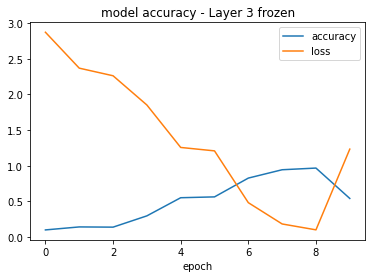

In [87]:
score = model_resnet50.evaluate(test_datagen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy - Layer 3 frozen')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [88]:
# Unfreeze the 4th dense layer & freeze the last hidden dense layer
model_resnet50.layers[3].trainable=True
model_resnet50.layers[4].trainable=False

model_resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model_resnet50.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_60 (Dense)            (None, 128)               262272    
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 10)                650       
                                                           

In [89]:
callback_acc = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

hist_resnet = model_resnet50.fit(train_datagen, epochs=epochs,
             validation_data=val_datagen, callbacks=[callback_acc])

Epoch 1/10


2022-05-17 17:26:27.014830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.0709 - accuracy: 0.6193

2022-05-17 17:28:41.773607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 151s 561ms/step - loss: 1.0709 - accuracy: 0.6193 - val_loss: 0.7188 - val_accuracy: 0.7931
Epoch 2/10
261/261 [==============================] - 145s 556ms/step - loss: 0.5573 - accuracy: 0.7998 - val_loss: 0.7836 - val_accuracy: 0.7284
Epoch 3/10
261/261 [==============================] - 145s 556ms/step - loss: 0.2185 - accuracy: 0.9217 - val_loss: 0.5269 - val_accuracy: 0.8865
Epoch 4/10
261/261 [==============================] - 146s 559ms/step - loss: 0.0880 - accuracy: 0.9756 - val_loss: 0.4611 - val_accuracy: 0.9346
Epoch 5/10
261/261 [==============================] - 148s 566ms/step - loss: 0.0171 - accuracy: 0.9974 - val_loss: 0.4384 - val_accuracy: 0.9468
Epoch 6/10
261/261 [==============================] - 149s 571ms/step - loss: 0.0437 - accuracy: 0.9897 - val_loss: 0.4853 - val_accuracy: 0.9109
Epoch 7/10
261/261 [==============================] - 146s 558ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.3915 - val_accura

Test loss: 0.30887410044670105
Test accuracy: 0.9238505959510803


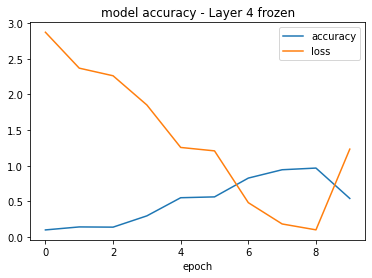

In [90]:
score = model_resnet50.evaluate(test_datagen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy - Layer 4 frozen')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()